# Gradient, Divergence & Curl

- 22 Jan 2024.
- Solution & Notes by Akhona Njeje.

In [3]:
# Application in Electro dynamics.
# f(x, y, z) is the f we depend on multiple variables.
# g(x, y, z) = [g(x), g(y), g(z)]
# f(r) = f(x, y, z) = exp(-x**2 - y**2)

import numpy as np
import matplotlib.pyplot as plt

def f(r):
    return np.exp(-r[0]**2 - r[1])**4

def g(r):
    return r / np.linalg.norm(r)

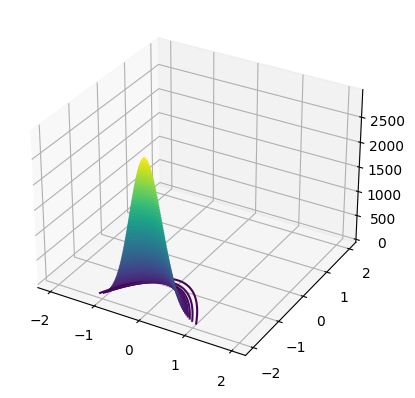

In [4]:
x3, y3 = np.meshgrid(np.linspace(-2, 2, 202), np.linspace(-2,2,202))
z3 = f(np.array([x3, y3]))

plotproj = plt.axes(projection = '3d')
plotproj.contour3D(x3, y3, z3, 100)

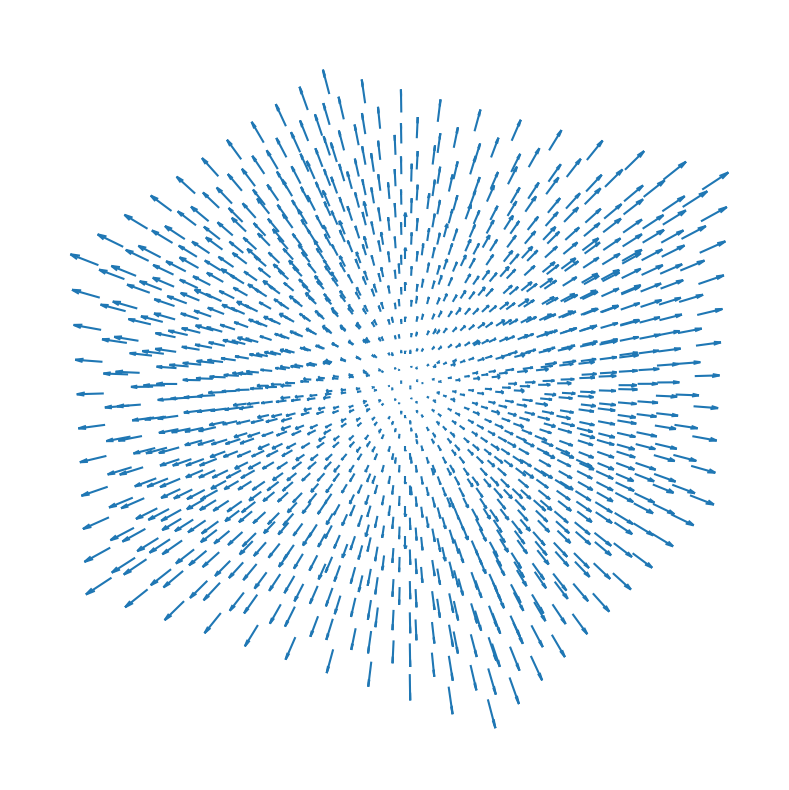

In [6]:
# Show the direction of g at 3d space.

plt.rcParams['figure.figsize'] = [15, 10]

x3, y3, z3 = np.meshgrid(np.linspace(-2, 2, 11), np.linspace(-2, 2, 11), np.linspace(-2, 2, 11))
values = g(np.array([x3, y3, z3]))

arrowplot = plt.axes(projection = '3d')
arrowplot.axis(False)

scale = 7
arrowplot.quiver(
    x3, y3, z3,
    values[0]*scale, values[1]*scale, values[2]*scale
)

In [7]:
# find the gradioent of the 3d curve.

def gradient(f, r, h):
    x, y, z = r
    partialx = (f(np.array([x+h, y, z])) - f(np.array([x-h, y, z]))) / (2*h)
    partialy = (f(np.array([x, y+h, z])) - f(np.array([x, y-h, z]))) / (2*h)
    partialz = (f(np.array([x, y, z+h])) - f(np.array([x-h, y, z-h]))) / (2*h)
    return np.array([partialx, partialy, partialz])

In [8]:
r, h = np.array([0.5, -1.2, -8]), 0.0001

gradient(f, r, h)   # Gradient is an array/matrix.

array([-178.80473559, -178.80474274,  -89.41130803])

In [9]:
# find the divergence & the curl.

def divergence(g, r, h):
    x, y, z = r
    dgxdy = (g(np.array([x+h, y, z]))[0] - g(np.array([x-h, y, z]))[0] / (2*h))
    dgydy = (g(np.array([x, y+h, z]))[0] - g(np.array([x, y-h, z]))[0] / (2*h))
    dgzdz = (g(np.array([x, y, z+h]))[0] - g(np.array([x, y, z-h]))[0] / (2*h))
    dgxdx = (g(np.array([x+h, y, z]))[0] - g(np.array([x-h, y, z]))[0] / (2*h))
    dgydy = (g(np.array([x, y+h, z]))[0] - g(np.array([x, y-h, z]))[0] / (2*h))
    dgzdz = (g(np.array([x, y, z+h]))[0] - g(np.array([x, y, z-h]))[0] / (2*h))
    return dgxdx + dgydy + dgzdz

divergence(g, r, h)

-925.1110771519484

In [10]:
def curl(g, r, h):
    x, y, z = r
    dgxdy = (g(np.array([x, y+h, z]))[0] - g(np.array([x, y-h, z]))[0] / (2*h))
    dgydz = (g(np.array([x, y, z+h]))[0] - g(np.array([x, y, z-h]))[0] / (2*h))
    dgzdx = (g(np.array([x+h, y, z]))[0] - g(np.array([x-h, y, z-h]))[0] / (2*h))
    dgxdz = (g(np.array([x, y, z+h]))[0] - g(np.array([x, y, z-h]))[0] / (2*h))
    dgydx = (g(np.array([x+h, y, z]))[0] - g(np.array([x-h, y, z]))[0] / (2*h))
    dgzdy = (g(np.array([x, y+h, z0]))[0] - g(np.array([x, y-h, z]))[0] / (2*h))
    return np.array([dgzdy-dgydz, dgxdz-dgzdx, dgydx-dgxdy])

curl(g, r, h)

NameError: name 'z0' is not defined